
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# data cleaning

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

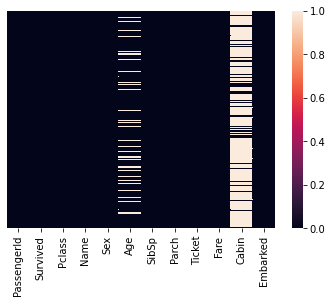

In [3]:
sns.heatmap(data.isnull(),yticklabels = False)

<AxesSubplot:xlabel='Age'>

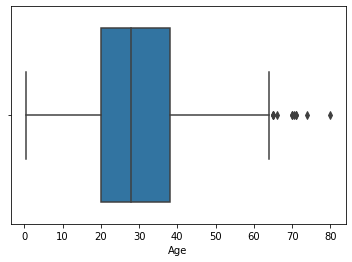

In [4]:
##outlier
sns.boxplot(x='Age', data= data)

<AxesSubplot:xlabel='Fare'>

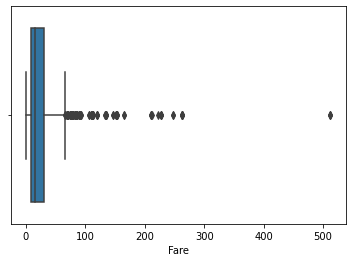

In [5]:
sns.boxplot(x='Fare',data = data)

In [6]:
missing_values = ["N/a","na",np.nan]
data = pd.read_csv("titanic.csv",na_values = missing_values)
data = data.drop(["PassengerId","Ticket","Cabin","Name"],axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [9]:
data = data.dropna(axis=0)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

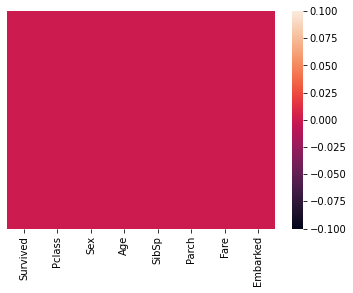

In [10]:
sns.heatmap(data.isnull(),yticklabels = False)

In [11]:
data_copy = data.copy()
print(data_copy['Sex'].unique())
dict_sex = {'male':0,'female':1}
print(data_copy['Embarked'].unique())
dict_Embarked = {'S':0,'C':1,'Q':2}
data_copy['Sex']=data_copy['Sex'].map(dict_sex)
data_copy['Embarked']=data_copy['Embarked'].map(dict_Embarked)
data_copy

['male' 'female']
['S' 'C' 'Q']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,28.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


<AxesSubplot:>

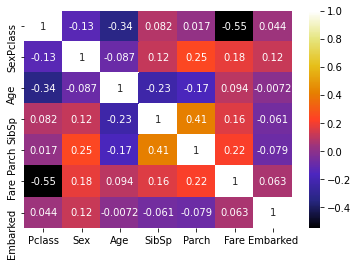

In [12]:
dm = data_copy.drop(['Survived'],axis=1)
l = data_copy['Survived'] 
cor = dm.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap)

/home/navneet/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


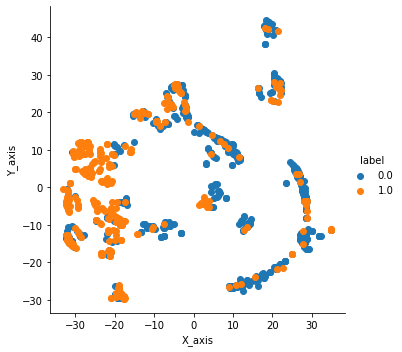

In [13]:
std_data = StandardScaler().fit_transform(dm) 

data_889 = std_data[:889,:]
labels_889 = l[:889]
  
model = TSNE(n_components = 2, random_state = 0)   
tsne_data = model.fit_transform(data_889) 

tsne_data = np.vstack((tsne_data.T, labels_889)).T 
tsne_df = pd.DataFrame(data = tsne_data,columns =("X_axis", "Y_axis", "label")) 

sns.FacetGrid(tsne_df, hue ="label", size = 5).map(plt.scatter, 'X_axis', 'Y_axis').add_legend() 
  
plt.show() 

In [14]:
X = data_copy.drop(['Survived'], axis = 1).values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = data_copy['Survived'].values
print(X.shape,y.shape)

(889, 7) (889,)


In [15]:
def sigmoid_fun(x):
    return 1/(1+np.exp(-x))

def log_reg(X,y,lr,itr):
    n,m = X.shape
    y = y.reshape(n,1)
    W = np.zeros((m,1))
    b = 0
    cost = []
    for i in range(0,itr):
        Z = np.dot(X,W) + b
        y_pred = sigmoid_fun(Z)
        cost_val = (-1/m)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        dW = (1/m)*(np.dot(X.T,y_pred - y))

        db = (1/m)*(np.sum(y_pred-y))
        W = W - lr*dW
        b = b - lr*db
        cost.append(cost_val)
    return W,b

def predict(X_test,y_test,W,b):
    Z = np.dot(X_test,W) + b
    y_pred = sigmoid_fun(Z)
    y_pred = y_pred > 0.5
    y_pred = y_pred.astype(int)
    y_pred = y_pred.flatten()
    y_test = y_test.flatten()
    acc = 0
    num_correct = 0
    for i in range(len(y_pred)):
        num_correct = np.sum(y_pred == y_test)
        acc = float(num_correct) / len(y_test)
    return acc ,y_pred


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle =True,random_state=123)
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (622, 7)
y_train.shape: (622,)
X_test.shape: (267, 7)
y_test.shape: (267,)


Accuracy using custom model : 0.7790262172284644
[[143  18]
 [ 41  65]]


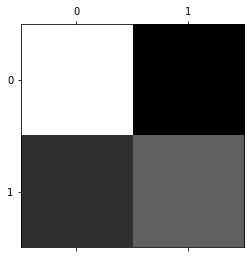

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       161
           1       0.78      0.61      0.69       106

    accuracy                           0.78       267
   macro avg       0.78      0.75      0.76       267
weighted avg       0.78      0.78      0.77       267



In [26]:
W,b= log_reg(X_train,y_train,0.0001,100000)
acc,y_pred = predict(X_test,y_test,W,b)
print("Accuracy using custom model :",acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
mat_fig_size = plt.figure(figsize=(4,4))
plt.matshow(cm, cmap=plt.cm.gray, fignum=mat_fig_size.number) 
plt.show()

# print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred, labels=[0,1]))

In [27]:
clf = LogisticRegression(random_state = 0) 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test) 
Acc =accuracy_score(y_test, y_pred)
print("Accuracy using sklearn model :",Acc)
cm1 = confusion_matrix(y_test, y_pred)
cm1

Accuracy using sklearn model : 0.7940074906367042


array([[144,  17],
       [ 38,  68]])

In [28]:
print("False positive rate (FPR) :",cm1[0][1]/(cm1[0][1]+cm1[1][1]))
print("True positive rate (Recall):",cm1[0][0]/(cm1[0][0]+cm1[1][0]))
print("Precision :",cm1[0][0]/(cm1[0][0]+cm1[0][1]))

False positive rate (FPR) : 0.2
True positive rate (Recall): 0.7912087912087912
Precision : 0.8944099378881988


In [29]:
print("F1 score : ",2*(cm1[0][0]/(cm1[0][0]+cm1[0][1]))*(cm1[0][0]/(cm1[0][0]+cm1[1][0]))/(cm1[0][0]/(cm1[0][0]+cm1[1][0])+(cm1[0][0]/(cm1[0][0]+cm1[0][1]))))

F1 score :  0.8396501457725947


In [30]:
print(classification_report(y_true=y_test, y_pred=y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       161
           1       0.80      0.64      0.71       106

    accuracy                           0.79       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267

